In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import sys
import os

import numpy as np
import pandas as pd

sys.path.append('../../')

In [2]:
IN_FILE = ("perf_node-test-case-04-1024x10.txt")
LIDAR_MODE = "1024x10"

df = pd.read_csv(IN_FILE, sep=",", header=0)

In [3]:
# Adapted from some work I did on the ifm3d project:
# https://github.com/ifm/ifm3d/blob/master/doc/jitter/jitter.ipynb

def plot_raw(df, title=''):
    ax = df.plot(marker='.', linestyle='', grid=True, title=title)
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Latency (ms)")
    return df

def plot_pct(df, title):
    df2 = df.quantile(q=np.linspace(0,1,df.shape[0]))
    ax = df2.plot(marker='x', linestyle='', grid=True, title=title)
    ax.set_xlabel("% of sample")
    ax.set_ylabel("Latency (ms)")
    return df2

<IPython.core.display.Javascript object>


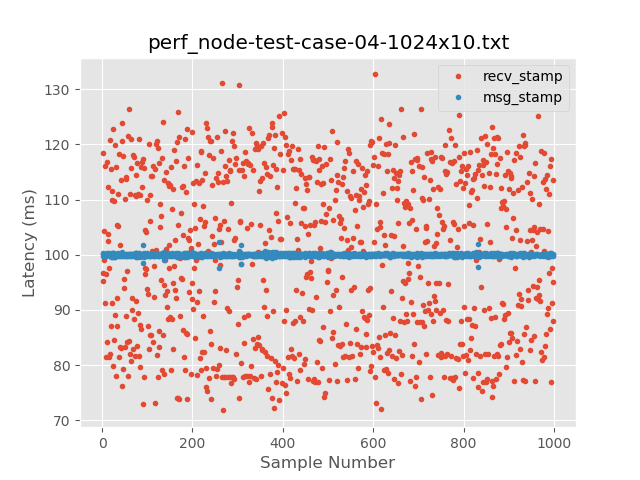

In [4]:
df2 = df.diff()*1e-6
_ = plot_raw(df2, IN_FILE)

<IPython.core.display.Javascript object>


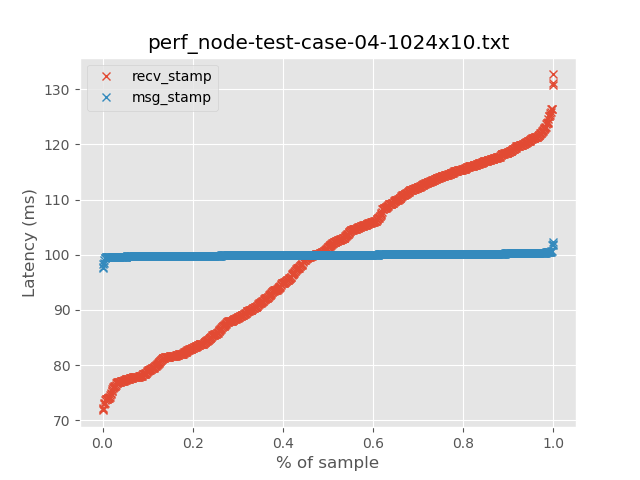

In [5]:
df3 = plot_pct(df2, IN_FILE)

In [6]:
df2.describe()

,recv_stamp,msg_stamp
count,999.000000,999.000000
mean,99.999993,100.000594
std,15.042417,0.259770
min,71.788703,97.633705
25%,85.637214,99.863342
50%,101.391622,100.002223
75%,114.132558,100.121584
max,132.707673,102.388822


In [7]:
df2_median = df2.median()
df2_median

recv_stamp    101.391622
msg_stamp     100.002223
dtype: float64

In [8]:
# The MAD gives us: "the most typical deviation from the most typical latency of X ms will be Y ms".
np.abs(df2.recv_stamp - df2_median.recv_stamp).median(), np.abs(df2.msg_stamp - df2_median.msg_stamp).median() 

(13.548738, 0.12880099999999572)

<IPython.core.display.Javascript object>


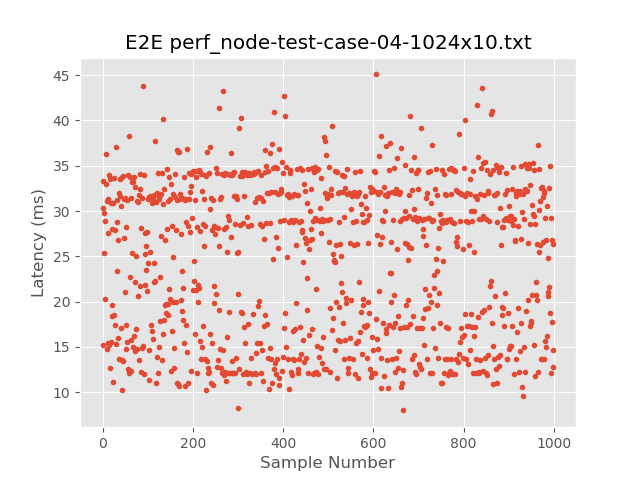

In [10]:
df_e2e = (df.recv_stamp - df.msg_stamp) * 1e-6
_ = plot_raw(df_e2e, "E2E %s" % IN_FILE)

<IPython.core.display.Javascript object>


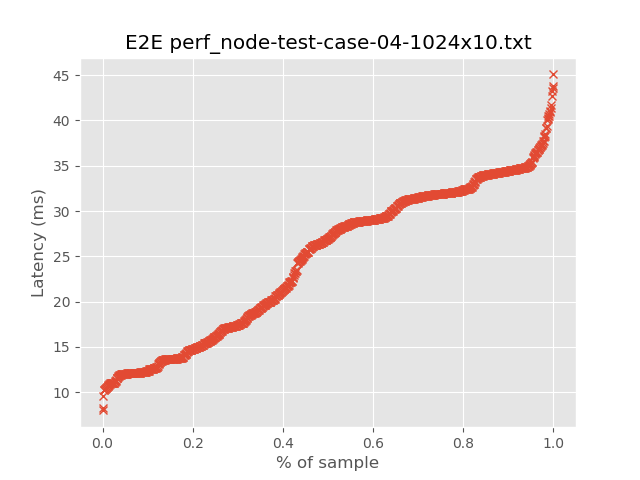

In [11]:
df4 = plot_pct(df_e2e, "E2E %s" % IN_FILE)

In [12]:
df_e2e.describe()

count    1000.000000
mean       24.619709
std         8.554664
min         7.990014
25%        16.130932
50%        26.965463
75%        31.910937
max        45.078776
dtype: float64

In [13]:
df_e2e_median = df_e2e.median()
df_e2e_median

26.9654635

In [14]:
np.abs(df_e2e - df_e2e_median).median()

7.144947999999999